In [25]:
%matplotlib inline

import pickle
import copy
import time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import networkx as nx

import seaborn as sn
import matplotlib.pyplot as plt

# GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid.
# Stratified K-Folds cross-validator. Provides train/test indices to split data in train/test sets
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold


In [2]:
df = pd.read_csv('./data/twitch_final_dataset.csv')

# To  remove"Unnamed: 0" column 
df = df.drop(columns=['Unnamed: 0']) 
df

,Source,Destination,Class,Page_Rank_Src,Page_Rank_Dst,Shortest_Path,Follows_Back,Followers_Src,Followees_Src,Followers_Dst,Followees_Dst,Int_Followers,Int_Followees
0,6194,255,1,0.000010,0.000040,6,0,0,4,1,3,0,0
1,6194,980,1,0.000010,0.000012,-1,0,0,4,0,15,0,1
2,6194,2992,1,0.000010,0.000022,4,0,0,4,2,0,0,0
3,6194,2507,1,0.000010,0.000018,3,0,0,4,8,14,0,0
4,6194,986,1,0.000010,0.000031,-1,0,0,4,0,19,0,0
5,6194,4003,1,0.000010,0.000022,-1,0,0,4,5,4,0,0
6,0,82,1,0.000010,0.000043,-1,0,0,0,0,2,0,0
7,15,343,1,0.000023,0.000022,-1,0,0,3,0,17,0,1
8,15,4282,1,0.000023,0.000044,4,0,0,3,16,15,0,0
9,15,5442,1,0.000023,0.000082,5,0,0,3,5,0,0,0


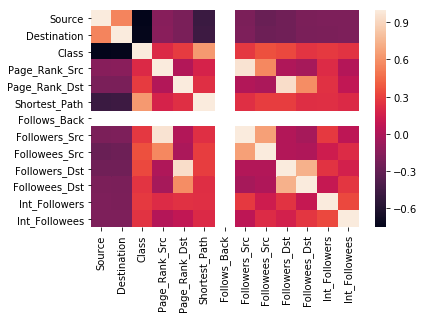

In [3]:
dataplot=sn.heatmap(df.corr())
plt.show()

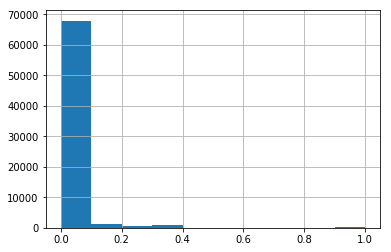

In [4]:
x = df['Page_Rank_Src']
df['Page_Rank_Src'] = ( x-x.min()) / ( x.max() - x.min() )  #normalise data in the range 0-1
df['Page_Rank_Src'].hist() # matplotlib library  used to plot a histogram

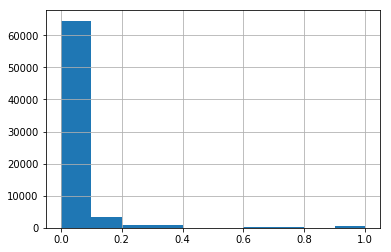

In [5]:
x = df['Page_Rank_Dst']
df['Page_Rank_Dst'] = ( x-x.min()) / ( x.max() - x.min() )
df['Page_Rank_Dst'].hist()

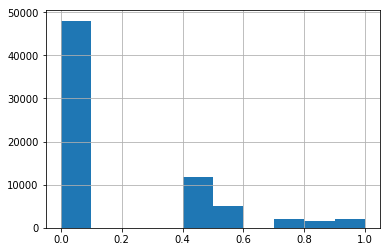

In [6]:
x = df['Shortest_Path']
df['Shortest_Path'] = ( x-x.min()) / ( x.max() - x.min() )
df['Shortest_Path'].hist()

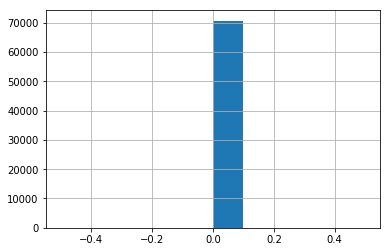

In [7]:
x = df['Follows_Back']
if x.max() != x.min():
    df['Follows_Back'] = ( x-x.min()) / ( x.max() - x.min() )
df['Follows_Back'].hist()

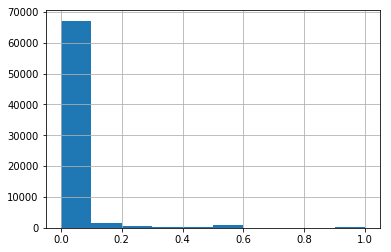

In [8]:
x = df['Followees_Dst']
df['Followees_Dst'] = ( x-x.min()) / ( x.max() - x.min() )
df['Followees_Dst'].hist()

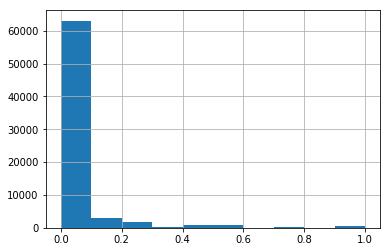

In [9]:
x = df['Followees_Src']
df['Followees_Src'] = ( x-x.min()) / ( x.max() - x.min() )
df['Followees_Src'].hist()

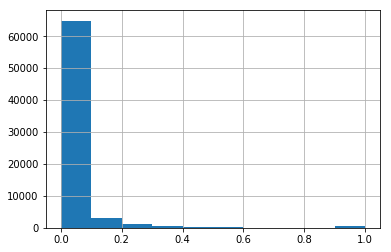

In [10]:
x = df['Followers_Dst']
df['Followers_Dst'] = ( x-x.min()) / ( x.max() - x.min() )
df['Followers_Dst'].hist()

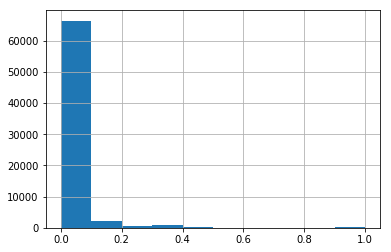

In [11]:
x = df['Followers_Src']
df['Followers_Src'] = ( x-x.min()) / ( x.max() - x.min() )
df['Followers_Src'].hist()

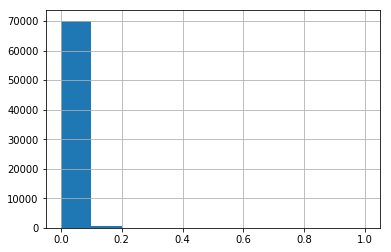

In [12]:
x = df['Int_Followees']
df['Int_Followees'] = ( x-x.min()) / ( x.max() - x.min() )
df['Int_Followees'].hist()

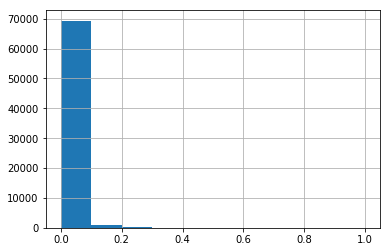

In [13]:
x = df['Int_Followers']
df['Int_Followers'] = ( x-x.min()) / ( x.max() - x.min() )
df['Int_Followers'].hist()

In [14]:
df.head(5)

,Source,Destination,Class,Page_Rank_Src,Page_Rank_Dst,Shortest_Path,Follows_Back,Followers_Src,Followees_Src,Followers_Dst,Followees_Dst,Int_Followers,Int_Followees
0,6194,255,1,0.0,0.016176,1.000000,0,0.0,0.010076,0.002506,0.007557,0.0,0.000000
1,6194,980,1,0.0,0.001062,0.000000,0,0.0,0.010076,0.000000,0.037783,0.0,0.013158
2,6194,2992,1,0.0,0.006685,0.714286,0,0.0,0.010076,0.005013,0.000000,0.0,0.000000
3,6194,2507,1,0.0,0.004499,0.571429,0,0.0,0.010076,0.020050,0.035264,0.0,0.000000
4,6194,986,1,0.0,0.011462,0.000000,0,0.0,0.010076,0.000000,0.047859,0.0,0.000000


In [15]:
df.to_csv('./data/twitch_preprocessed_data.csv')

In [16]:
g = nx.from_pandas_edgelist(df[['Source','Destination']], source='Source', target='Destination',create_using=nx.DiGraph())
print nx.info(g)

Name: 
Type: DiGraph
Number of nodes: 50121
Number of edges: 70648
Average in degree:   1.4095
Average out degree:   1.4095


In [17]:
df_x = df.drop(columns=['Source', 'Destination', 'Class'])
df_y = df[['Class']]
x_train, x_test, y_train, y_test  = train_test_split(df_x, df_y, test_size = 0.3, random_state=7)

## 1. Logistic Regression

In [30]:
#L1 regularization penalizes the sum of absolute values of the weights, whereas L2 regularization penalizes the sum of squares of the weights
penalty_values = ['l1', 'l2']
c_values = np.logspace(0, 4, 10)
param_grid = {'C' : c_values, 'penalty' : penalty_values}

gs_lr = GridSearchCV(cv = 10, estimator = LogisticRegression(), param_grid = param_grid)

In [31]:
start = time.time()
gs_lr.fit(x_train, y_train) #fitting the model for grid search
end = time.time()
print 'Time taken to train model : ', round(end-start,2) , ' seconds'

Time taken to train model :  32.96  seconds


In [19]:
pickle.dump(gs_lr.best_estimator_, open('./data/twitch_lr_model.p', 'wb'))
print gs_lr.best_params_ # print best parameter after tuning

{'penalty': 'l2', 'C': 1291.5496650148827}


In [20]:
print classification_report(gs_lr.best_estimator_.predict(x_test), y_test) 

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     11215
           1       0.92      0.98      0.95      9980

   micro avg       0.95      0.95      0.95     21195
   macro avg       0.95      0.95      0.95     21195
weighted avg       0.95      0.95      0.95     21195



In [21]:
print confusion_matrix(gs_lr.best_estimator_.predict(x_test), y_test) 

[[10321   894]
 [  199  9781]]


## 2. Random Forest

In [90]:
estimators = [50, 100, 150]
depths = [9, 12, 15, 24]
split = np.random.randint(100, 150, 2)
leaves = np.random.randint(20, 30, 2)
param_grid = {'n_estimators' : estimators, 'max_depth' : depths, 'min_samples_split' : split, 'min_samples_leaf' : leaves}

gs_rf = GridSearchCV(cv = 10, estimator = RandomForestClassifier(), param_grid = param_grid)

In [11]:
start = time.time()
gs_rf.fit(x_train, y_train) 
end = time.time()
print 'Time taken to train model : ', round(end-start,2) , ' seconds'

NameError: name 'gs_rf' is not defined

In [92]:
pickle.dump(gs_rf.best_estimator_, open('./data/twitch_rf_model.p', 'wb')) 
print gs_rf.best_params_

{'min_samples_split': 102, 'n_estimators': 100, 'max_depth': 24, 'min_samples_leaf': 25}


In [93]:
print classification_report(gs_rf.best_estimator_.predict(x_test), y_test) 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     10768
           1       0.96      0.98      0.97     10427

   micro avg       0.97      0.97      0.97     21195
   macro avg       0.97      0.97      0.97     21195
weighted avg       0.97      0.97      0.97     21195



In [94]:
print confusion_matrix(gs_rf.best_estimator_.predict(x_test), y_test) 

[[10312   456]
 [  208 10219]]


## 3. SVM

In [95]:
kernels = ['rbf', 'linear']
c_values = [0.001, 0.01, 0.1, 1]
param_grid = {'kernel':kernels, 'C':c_values}

gs_svm = GridSearchCV(cv=10, estimator=svm.SVC(), param_grid=param_grid)

In [97]:
start = time.time()
gs_svm.fit(x_train, y_train)
end = time.time()
print 'Time taken to train model : ', round(end-start,2) , ' seconds'

Time taken to train model :  4013.46  seconds


In [98]:
pickle.dump(gs_svm.best_estimator_, open('./data/twitch_svm_model.p', 'wb'))
print gs_svm.best_params_

{'kernel': 'linear', 'C': 1}


In [99]:
print classification_report(gs_svm.best_estimator_.predict(x_test), y_test)

              precision    recall  f1-score   support

           0       0.99      0.90      0.94     11525
           1       0.89      0.99      0.94      9670

   micro avg       0.94      0.94      0.94     21195
   macro avg       0.94      0.94      0.94     21195
weighted avg       0.94      0.94      0.94     21195



In [100]:
print confusion_matrix(gs_svm.best_estimator_.predict(x_test), y_test)

[[10384  1141]
 [  136  9534]]


# 4.AdaBoost

In [18]:
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

In [19]:
model = AdaBoostClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
gs_ab = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

In [20]:
start = time.time()
gs_ab.fit(x_train,y_train)
end = time.time()
print 'Time taken to train model : ', round(end-start,2) , ' seconds'

Time taken to train model :  691.21  seconds


In [21]:
pickle.dump(gs_ab.best_estimator_, open('./data/twitch_ab_model.p', 'wb')) 
print gs_ab.best_params_

{'n_estimators': 10, 'learning_rate': 1.0}


In [22]:
print classification_report(gs_ab.best_estimator_.predict(x_test), y_test)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     10579
           1       0.96      0.96      0.96     10616

   micro avg       0.96      0.96      0.96     21195
   macro avg       0.96      0.96      0.96     21195
weighted avg       0.96      0.96      0.96     21195



In [23]:
print confusion_matrix(gs_ab.best_estimator_.predict(x_test), y_test)

[[10132   447]
 [  388 10228]]
